In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

PREPROCESSING DATA

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

DATA SPLITTING

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

MODEL TRAINING NAIVE BAYES GAUSSIAN NB

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

MODEL EVALUATION

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

#print evaluasi model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


IMPORT AND LOAD MODEL

In [ ]:
import pickle

#save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

#load the model
with open('model.pkl', 'rb') as f:
    clf = pickle.load(f)

HYPERPARAMETER TUNING

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel' : ('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


CROSS VALIDATION

In [16]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv=kfold)

#print cross validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.14)


PIPELINE

In [21]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    StandardScaler(),
    GaussianNB()
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


FEATURE SELECTION

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("Selected features:", selector.get_support())


Selected features: [False False  True  True]


DATA VISUALIZATION

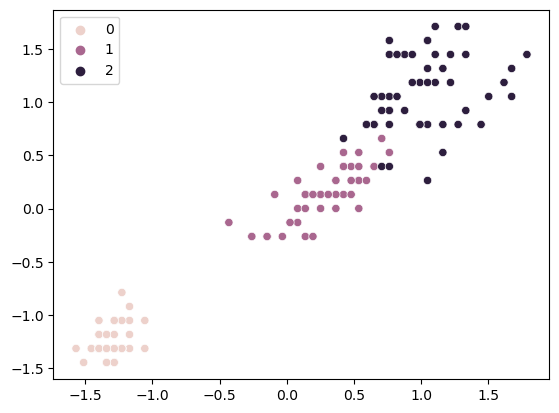

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = X_new[:,0], y = X_new[:, 1], hue = y)
plt.show()

UNSUPERVISED WITH K-MEANS

c:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


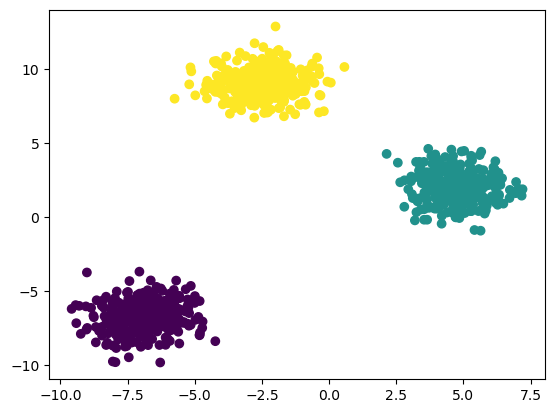

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()


UNSUPERVISED WITH AGGLOMERATIVE

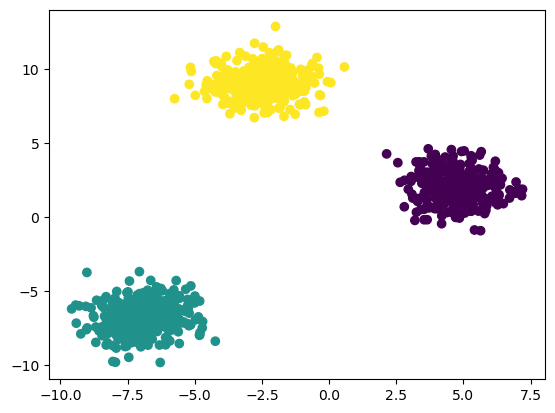

In [35]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Perform clustering with Agglomerative
agg = AgglomerativeClustering(n_clusters=3)
y_pred = agg.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()


K-Means melakukan pengelompokan data dengan membagi data ke dalam beberapa cluster berdasarkan jarak antara data dengan pusat cluster terdekat. Sedangkan Agglomerative melakukan pengelompokan data dengan menggabungkan data yang memiliki jarak terdekat satu sama lain menjadi satu cluster, dan terus melakukan penggabungan hingga mencapai jumlah cluster yang diinginkan.

UNSUPERVISED WITH DBSCAN

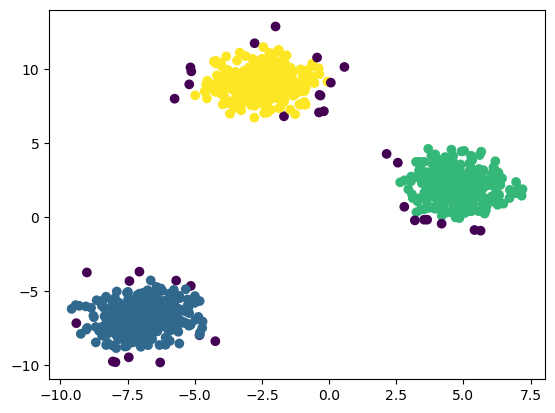

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Perform clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()
